In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix

In [172]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [173]:
df = df.fillna(df.mean())

# 1) 100, None, None

In [174]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = None,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

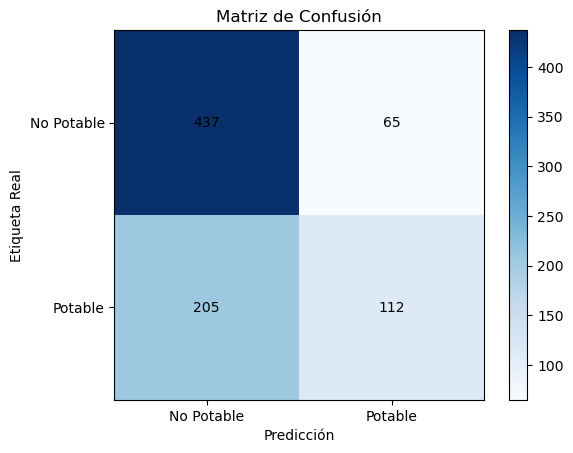

In [175]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [176]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6703296703296703

In [177]:
max_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]

max(max_depths)

40

# 2) 100, 25, None

In [178]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 25,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

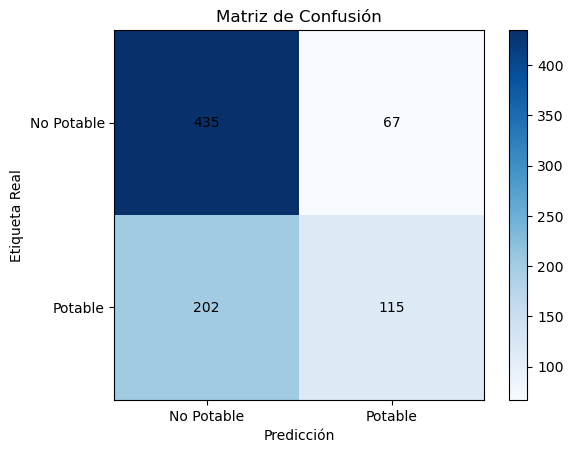

In [179]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [180]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6715506715506715

# 3) 100, 10, None

In [181]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 10,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

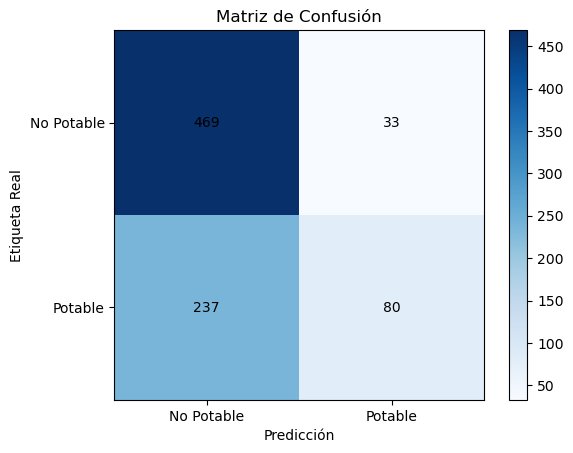

In [182]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [183]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6703296703296703

# 4) 100, None, Square Root

In [184]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = None,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

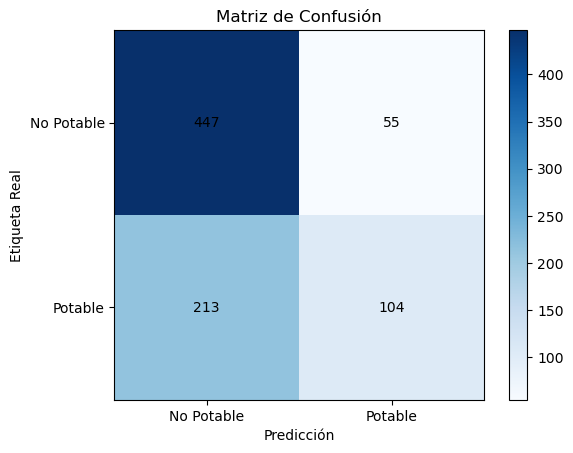

In [185]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [186]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6727716727716728

# 5) 100, 25, Square Root

In [187]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 25,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

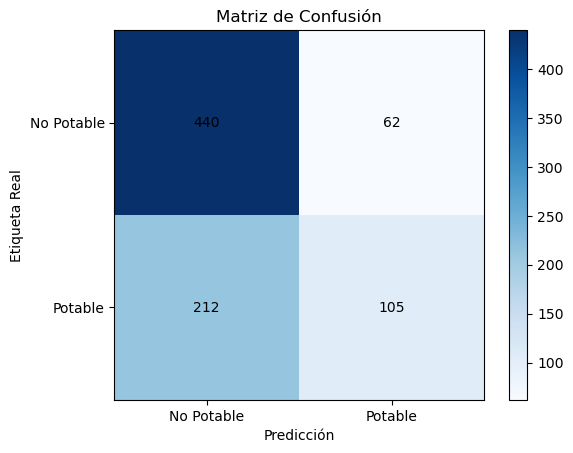

In [188]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [189]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6654456654456654

# 6) 100, 10, Square Root

In [190]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 10,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

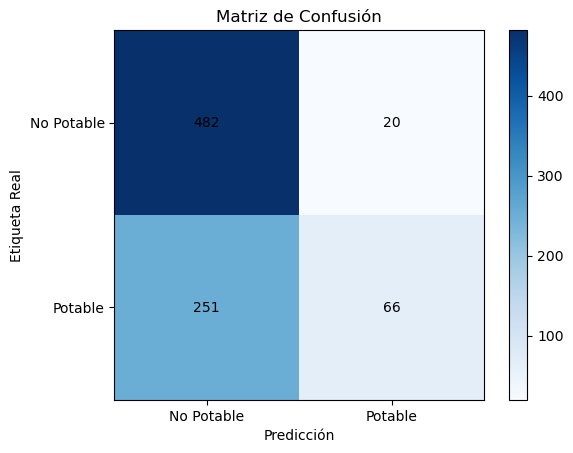

In [191]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [192]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6691086691086691

# 7) 50, None, None

In [193]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = None,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

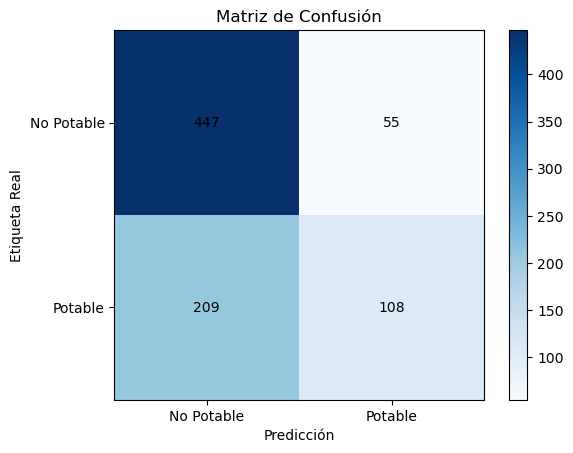

In [194]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [195]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6776556776556777

# 8) 50, 25, None

In [196]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 25,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

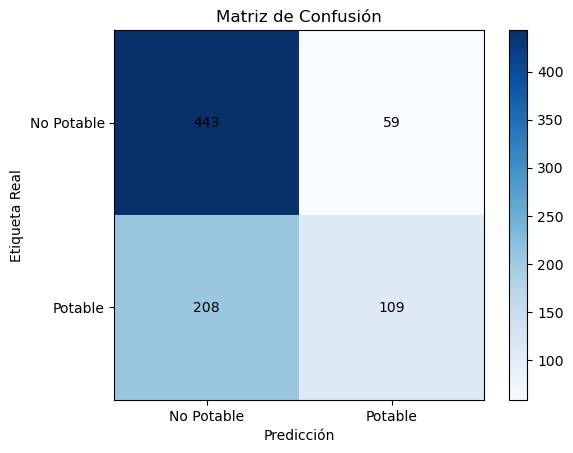

In [197]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [198]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.673992673992674

# 9) 50, 10, None

In [199]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 10,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

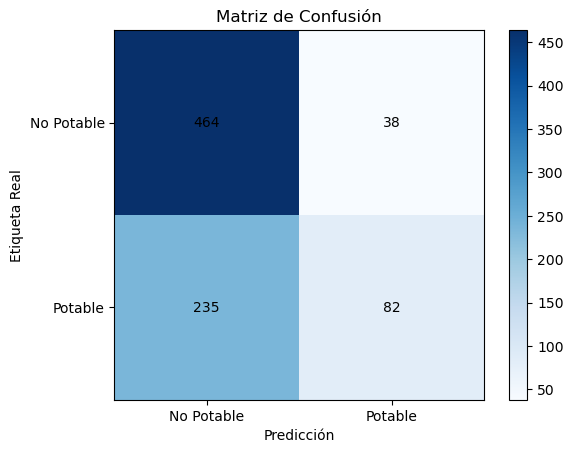

In [200]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [201]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6666666666666666

# 10) 50, None, Square Root

In [202]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = None,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

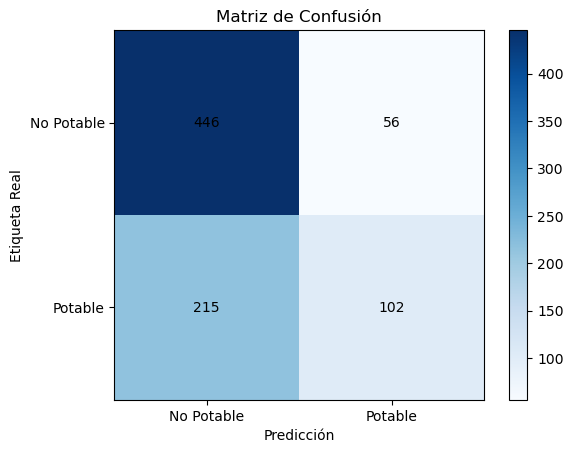

In [203]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [204]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6691086691086691

# 11) 50, 25, Square Root

In [205]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 25,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

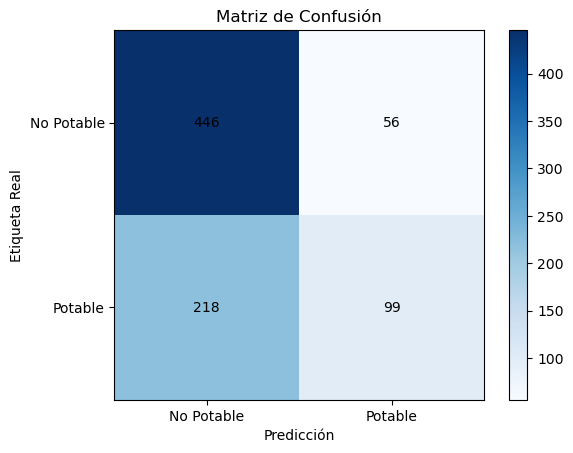

In [206]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [207]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6654456654456654

# 12) 50, 10, Square Root

In [208]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 10,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

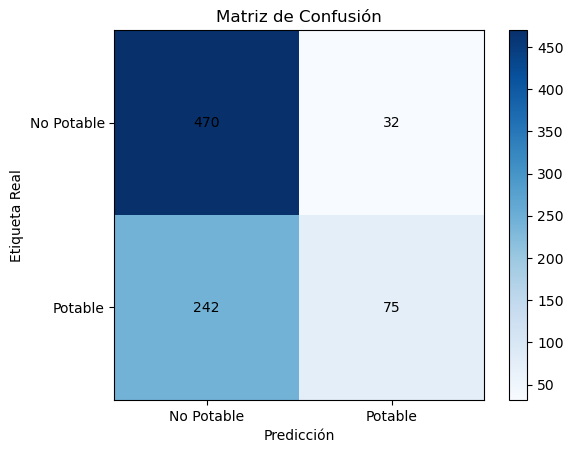

In [209]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [210]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6654456654456654

# 13) 25, None, None

In [211]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = None,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

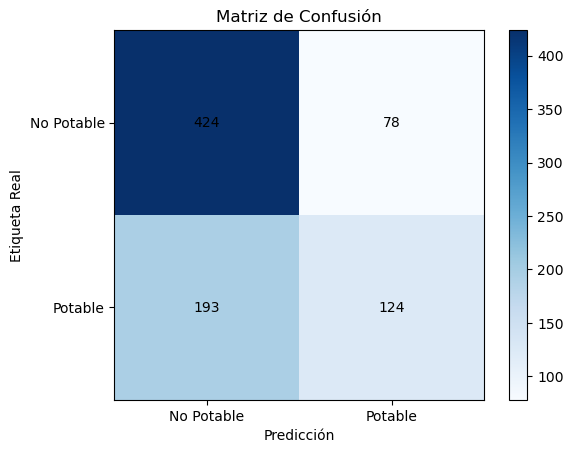

In [212]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [213]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6691086691086691

# 14) 25, 25, None

In [214]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 25,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

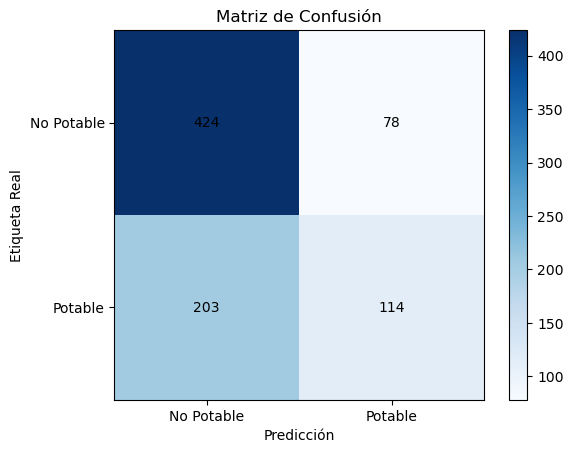

In [215]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [216]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6568986568986569

# 15) 25, 10, None

In [217]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 10,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

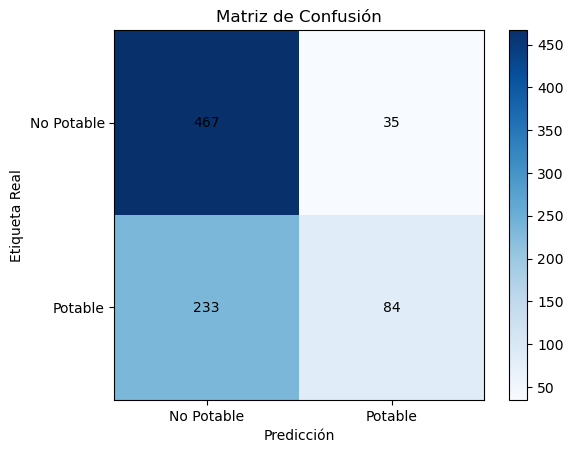

In [218]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [219]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6727716727716728

# 16) 25, None, Square Root

In [220]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = None,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

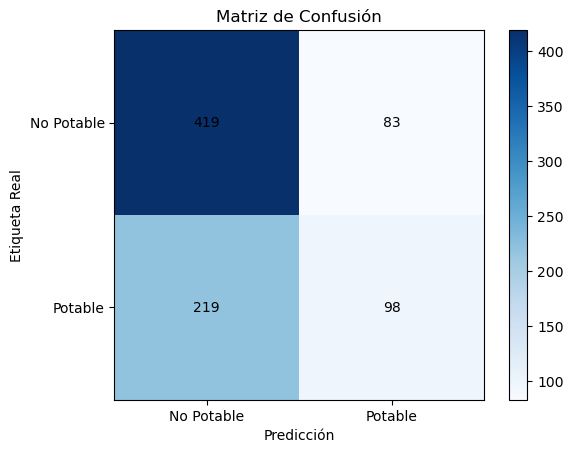

In [221]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [222]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6312576312576312

# 17) 25, 25, Square Root

In [223]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 25,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

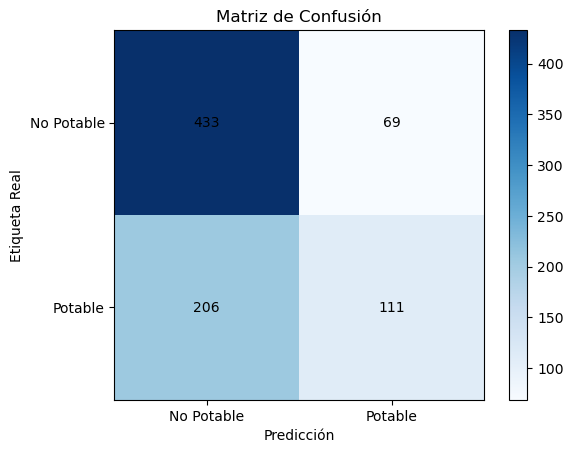

In [224]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [225]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.6642246642246642

# 18) 25, 10, Square Root

In [226]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 10,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

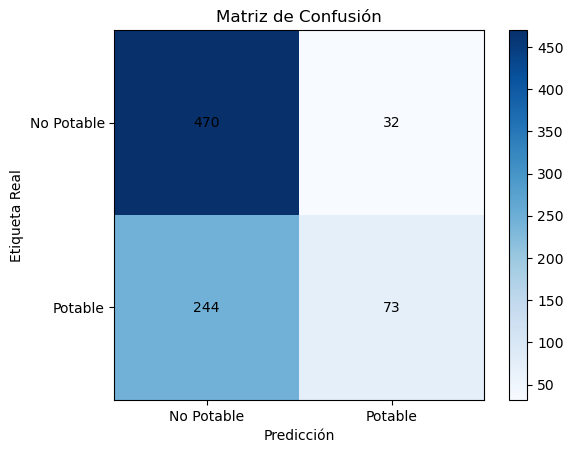

In [227]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [228]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.663003663003663